In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | divnomorskoye
Processing Record 2 of Set 1 | avera
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | puntarenas
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | tuy hoa
Processing Record 10 of Set 1 | bahia blanca
Processing Record 11 of Set 1 | karabulak
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | warqla
City not found. Skipping...
Processing Record 19 of Set 1 | kieta
Processing Record 20 of Set 1 | makat
Processing Record 21 of Set 1 | mitu
Processing Record 22 of Set 1 | puerto ayora
Proc

Processing Record 34 of Set 4 | saleaula
City not found. Skipping...
Processing Record 35 of Set 4 | victoria
Processing Record 36 of Set 4 | kenai
Processing Record 37 of Set 4 | celestun
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | mahibadhoo
Processing Record 42 of Set 4 | aporawan
City not found. Skipping...
Processing Record 43 of Set 4 | qaqortoq
Processing Record 44 of Set 4 | madaoua
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | kalmunai
Processing Record 47 of Set 4 | galle
Processing Record 48 of Set 4 | manyana
Processing Record 49 of Set 4 | eureka
Processing Record 50 of Set 4 | doctor arroyo
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | kaarina
Processing Record 3 of Set 5 | falun
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | churapcha
Processing Record 6 of Set 5 | taoudenni
Processing Reco

Processing Record 22 of Set 8 | sandovo
Processing Record 23 of Set 8 | salym
Processing Record 24 of Set 8 | somerset
Processing Record 25 of Set 8 | yar-sale
Processing Record 26 of Set 8 | sobolevo
Processing Record 27 of Set 8 | stillwater
Processing Record 28 of Set 8 | kuah
Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | nshamba
Processing Record 31 of Set 8 | vestmannaeyjar
Processing Record 32 of Set 8 | libreville
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | xuddur
Processing Record 35 of Set 8 | oga
Processing Record 36 of Set 8 | north bend
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | nuremberg
Processing Record 39 of Set 8 | neuquen
Processing Record 40 of Set 8 | campoverde
Processing Record 41 of Set 8 | sao gabriel da cachoeira
Processing Record 42 of Set 8 | veraval
Processing Record 43 of Set 8 | innisfail
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set

Processing Record 11 of Set 12 | mineiros
Processing Record 12 of Set 12 | porbandar
Processing Record 13 of Set 12 | north platte
Processing Record 14 of Set 12 | gelemso
Processing Record 15 of Set 12 | iquitos
Processing Record 16 of Set 12 | petatlan
Processing Record 17 of Set 12 | quepos
Processing Record 18 of Set 12 | russell
Processing Record 19 of Set 12 | cantagallo
Processing Record 20 of Set 12 | laguna
Processing Record 21 of Set 12 | berdigestyakh
Processing Record 22 of Set 12 | camalu
Processing Record 23 of Set 12 | la ronge
Processing Record 24 of Set 12 | san policarpo
Processing Record 25 of Set 12 | hovd
Processing Record 26 of Set 12 | lebyazhye
Processing Record 27 of Set 12 | lyuban
Processing Record 28 of Set 12 | mugur-aksy
Processing Record 29 of Set 12 | ornskoldsvik
Processing Record 30 of Set 12 | kerur
Processing Record 31 of Set 12 | muzhi
Processing Record 32 of Set 12 | mareeba
Processing Record 33 of Set 12 | banda aceh
Processing Record 34 of Set 12

In [12]:
len(city_data)

560

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Divnomorskoye,44.5011,38.1353,32.56,80,100,9.64,RU,2022-02-05 03:06:29
1,Avera,33.1940,-82.5271,49.71,83,100,15.26,US,2022-02-05 03:06:30
2,New Norfolk,-42.7826,147.0587,69.89,52,98,1.99,AU,2022-02-05 03:06:30
3,Srednekolymsk,67.4500,153.6833,-27.44,100,100,0.83,RU,2022-02-05 03:06:30
4,Khatanga,71.9667,102.5000,-35.79,100,87,2.53,RU,2022-02-05 03:05:11
5,Rikitea,-23.1203,-134.9692,79.07,68,4,8.14,PF,2022-02-05 03:05:01
6,Puntarenas,9.9763,-84.8384,80.53,76,12,1.66,CR,2022-02-05 03:06:31
7,Hasaki,35.7333,140.8333,48.29,33,7,14.43,JP,2022-02-05 03:06:32
8,Tuy Hoa,13.0833,109.3000,75.70,87,63,16.51,VN,2022-02-05 03:06:32
9,Bahia Blanca,-38.7196,-62.2724,65.14,81,100,13.38,AR,2022-02-05 03:03:26


In [14]:
#new_column_order = ["column2", "column9", "column10", "column3", "column4", "column5", "column6", "column7", "column8"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Divnomorskoye,RU,2022-02-05 03:06:29,44.5011,38.1353,32.56,80,100,9.64
1,Avera,US,2022-02-05 03:06:30,33.1940,-82.5271,49.71,83,100,15.26
2,New Norfolk,AU,2022-02-05 03:06:30,-42.7826,147.0587,69.89,52,98,1.99
3,Srednekolymsk,RU,2022-02-05 03:06:30,67.4500,153.6833,-27.44,100,100,0.83
4,Khatanga,RU,2022-02-05 03:05:11,71.9667,102.5000,-35.79,100,87,2.53
...,...,...,...,...,...,...,...,...,...
555,Manggar,ID,2022-02-05 03:22:08,-2.8833,108.2667,82.63,71,100,5.39
556,Waingapu,ID,2022-02-05 03:22:09,-9.6567,120.2641,86.34,66,44,13.35
557,Buritis,BR,2022-02-05 03:22:09,-15.6178,-46.4233,71.92,89,98,1.45
558,Zemio,CF,2022-02-05 03:22:10,5.0314,25.1361,68.83,31,100,1.81


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

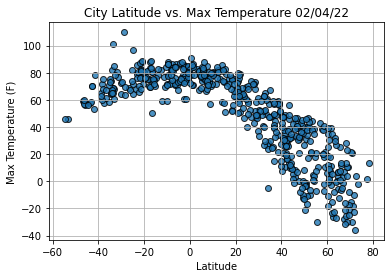

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

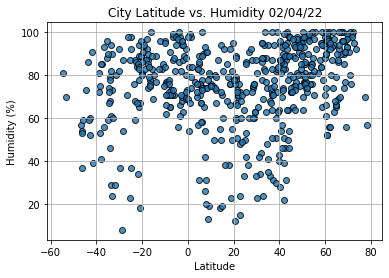

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

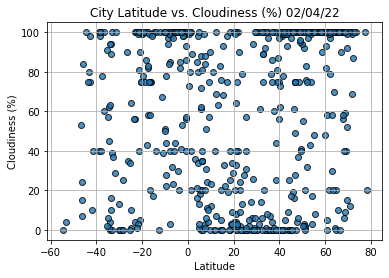

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

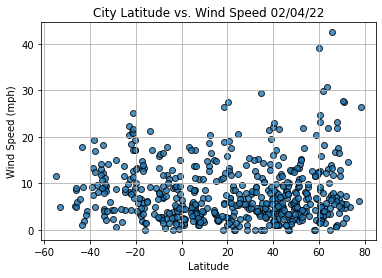

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                  Fort Nelson
Country                        CA
Date          2022-02-05 03:02:18
Lat                       58.8053
Lng                     -122.7002
Max Temp                     -7.4
Humidity                       95
Cloudiness                    100
Wind Speed                   2.21
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
555    False
556    False
557    False
558     True
559    False
Name: Lat, Length: 560, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Divnomorskoye,RU,2022-02-05 03:06:29,44.5011,38.1353,32.56,80,100,9.64
1,Avera,US,2022-02-05 03:06:30,33.1940,-82.5271,49.71,83,100,15.26
3,Srednekolymsk,RU,2022-02-05 03:06:30,67.4500,153.6833,-27.44,100,100,0.83
4,Khatanga,RU,2022-02-05 03:05:11,71.9667,102.5000,-35.79,100,87,2.53
6,Puntarenas,CR,2022-02-05 03:06:31,9.9763,-84.8384,80.53,76,12,1.66


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

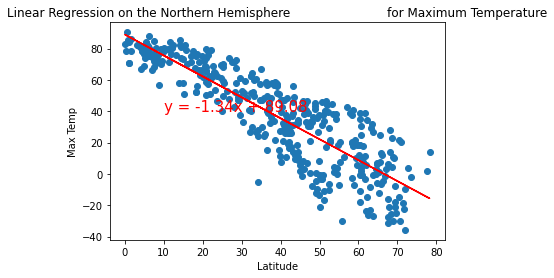

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

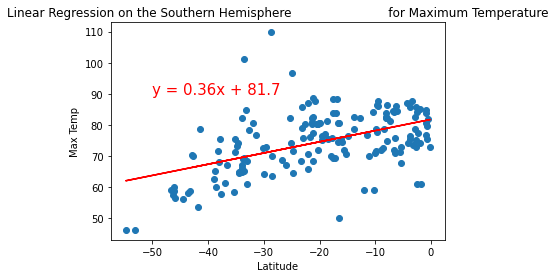

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

Findings: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

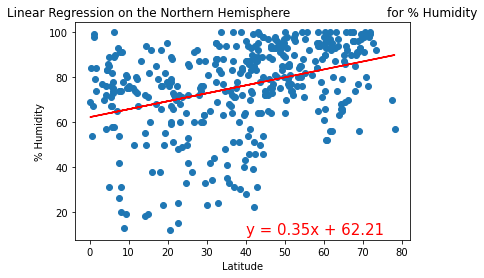

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

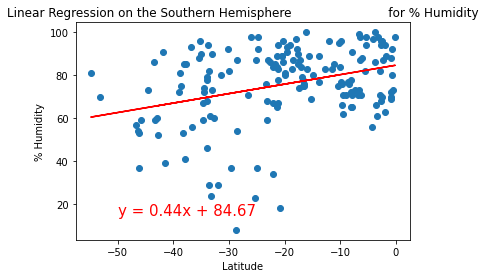

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

Findings: The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

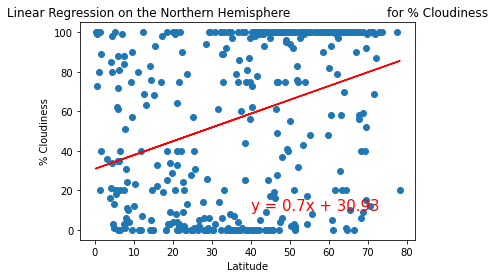

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

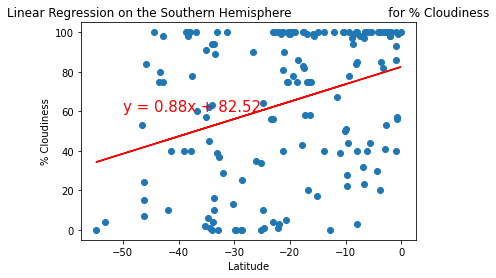

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

Findings: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots.  

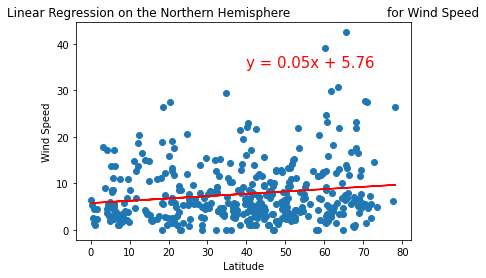

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

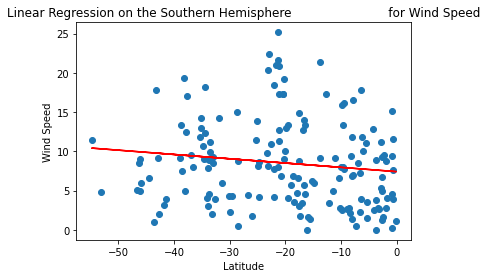

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

Findings: The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 